<a href="https://colab.research.google.com/github/seohii66/DataMining/blob/main/4%EC%9E%A5_%EB%B6%84%EC%84%9D%EC%9D%84_%EC%9C%84%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%81%B4%EB%A6%AC%EB%8B%9D%EA%B3%BC_%EC%A4%80%EB%B9%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 특징 선택, 차원감소

### scikit-learn 변환 API
#### 데이터 변환의 단계
 1. 모듈을 임포트한다

 2. 변환 객체를 설명

 3. 훈련데이터에 입력시키기 위해 모델을 적합시킨다

 4. 새로운 테스트 데이터를 변환시킨다.

### 입력 데이터 클리닝
 결측값 또는 오염된 값은 잘못된 결론을 내리거나 인사이트를 놓치게 할 수 있다.


#### * 결측값
 

In [ ]:
# 결측값을 갖는 iris 데이터셋 로딩하기
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dmdata/iris_missing_values.csv')
df.index.name = "record"
print(df.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      NaN                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      NaN                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


 => pandas는 데이터프레임의 결측값을 NaN으로 채운다

##### - 결측값 찾기와 제거하기
데이터가 데이터프레임에 로딩되면 .isnull() 기법을 통해 모든 널값을 찾을 수 있다.

In [ ]:
# NaN에 대해 각 데이터의 참/거짓을 얻기
df['sepal length in cm'].isnull()


record
0       True
1      False
2       True
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal length in cm, Length: 150, dtype: bool

In [ ]:
# 열에서 결측값이 있는지 점검
print(df['sepal length in cm'].isnull().values.any())

True


In [ ]:
# 열에서 결측값의 수 확인
print(df['sepal length in cm'].isnull().values.sum())

6


In [ ]:
# 결측값은 원하는 값으로 대체 가능하다
# 결측값을 새로운 값으로 채우고, 새로운 df_example 데이터 프레임에 저장
df_example = df['sepal length in cm'].fillna('example')
print(df_example.head())

record
0    example
1        4.9
2    example
3        4.6
4        5.0
Name: sepal length in cm, dtype: object


In [ ]:
# 교체하기를 원하지 않는 결측값의 행이나 열을 쉽게 제거가능하다
# 결측값이 있는 행 제거
df_dropped = df.dropna(axis = 0)
print(df_dropped.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
1                      4.9                3.0                 1.4   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   
6                      4.6                3.4                 1.4   
7                      5.0                3.4                 1.5   

        petal width in cm species  
record                             
1                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  
6                     0.3  setosa  
7                     0.2  setosa  


In [ ]:
# 결측값이 있는 열 제거
df_dropped = df.dropna(axis = 1)
print(df_dropped.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


##### - 결측값을 대체하기 위한 임퓨팅
결측값이 띄엄띄엄 있는 경우, 빈셀의 대체 값을 예측가능하다
-> 예측하는 수학적인 장치 : "임퓨터"


- missing_values : 데이터에서 결측값의 형태를 가리킨다
- stategy : 임퓨트 기법을 의미 (선택은 평균, 중앙값, 최빈값, 상수 중 하나)
      - strategy = constant 인 경우, 상수를 정하기 위해 fill_value 옵션 사용가능


In [ ]:
# scikit-learn에서 임퓨터 모듈을 import하고 임퓨터 객체 초기화
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [ ]:
# 임퓨트할 열 정의
cols = ['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm',]

In [ ]:
# 임퓨터를 적합시키고 데이터를 변환한 뒤 df_new에 저장
out_imp = imputer.fit_transform(df[cols])

df_new = pd.DataFrame(data = out_imp, columns = cols)
df_new = pd.concat([df_new, df[['species']]], axis = 1)

print(df_new.head())

   sepal length in cm  sepal width in cm  petal length in cm  \
0            5.870139                3.5                 1.4   
1            4.900000                3.0                 1.4   
2            5.870139                3.2                 1.3   
3            4.600000                3.1                 1.5   
4            5.000000                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


=> record 0,2는 imputing된 값을 갖고, 그 값은 sepal length 열의 평균이다

### * 특징 스케일링
상수를 곱해도 성질이 바뀌지 않는 경우, 그 수학적 성질은 '스케일 불변'으로 간주된다

* 스케일링은 스케일 불변이 아닌 변환과 학습 알고리즘에 대해 중요
- 스케일 불변이 아닌 알고리즘 
      - 주요 요소 분석 PCA
      - 패널티 회귀 penalized regression

      -> 큰 값들이 알고리즘 내에서 매개변수 공간을 독점하게 되고 그 결과, 몇몇 특징들이 데이터 마이닝의 결과에 과도한 영향을 미치게 된다



==> 해결방법 ) 각 특징을 **비슷한 스케일**로 적용하는 것 , 후에는 **분산과 편향** 에 집중

      - 분산과 편향 : 데이터 분포의 성질
      - 스케일은 임의의 값이지만 분포는 그렇지 않다



In [ ]:
# iris 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/dmdata/iris.csv')
df.index.name = "record"

In [ ]:
# 스케일링할 열 정의
cols = ['sepal length in cm', 
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm',]

#### - 정규화 normalization
모든 값이 0과 1사이( 혹은 -1과 1 사이) 에 위치하도록 각 특징 공간을 rescale하는 것이다

가장 흔한 방법 : MinMaxScaler()함수의 루틴 이용


- 이 변환을 이상치로부터 보호할 수 있는 방법은 없으며, *이상치는 정규화하기 전에 제거*해야한다 
 - 그렇지 않으면, 합당한 데이터들이 0-1 전체의 범위에 적절하게 펼쳐지지 못하고 유용한 데이터는 더 적은 범위로 모이게 됨




In [ ]:
# 모듈을 로딩하고 객체 초기화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
# 데이터를 정규화하고 out_scaled numpy 행렬에 저장
out_scaled = scaler.fit_transform(df[cols])

#### - 표준화 standardization
같은 스케일 상의 각 특징 공간 내에서 변동을 위치시키기 위해 사용

데이터를 단위 분산에 대해 펼치고 0을 중간에 맞춘다
 - 다른 값이 고급 표준화에 대해 선택될 수도 있지만 보통 평균 = 0, 분산 = 1이 가장 흔하다

In [ ]:
# 모듈을 로딩하고 객체 초기화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# 데이터를 표준화하고 out_scaled numpy 행렬에 저장
out_scaled = scaler.fit_transform(df[cols])

### * 카테고리 데이터 처리
- one-hot 원핫 인코딩 ( 기본적인 순서적 인코딩 )
  : 순서적 혹은 명목적 변수에 모두 사용된다

- 레이블 인코딩 
: 카테고리 타깃 변수를 간단한 단일 단계로 유용한 것으로 바꿔줌

In [ ]:
# long_jump 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/dmdata/long_jump.csv")
df.set_index('Person',inplace = True)

#### 순서적 인코딩
 순서적 변수 : 순서가 있다

 큰 값 = 실제로 큰 것을 의미

In [ ]:
# 카테고리 열에 필터 적용
cats = ['Jersey Size', 'Shoe Size']
print(df[cats])

        Jersey Size  Shoe Size
Person                        
Thomas        small          7
Jane         medium         10
Vaughn        large         12
Vera         medium          9
Vincent       large         12
Lei-Ann       small          7


- 항상 적절한 모듈을 임포트하고 인코더 객체를 예시하는 것부터 시작한다.
- 다음으로 입력 데이터에 객체를 적합시키고
- 한번에 .fit_transform()기법으로 변환시킨다.
- 마지막으로 새로운 카테고리와 결과 행렬을 .categories_ 와 out_enc로 출력

In [ ]:
# 모듈을 import하고 enc객체 초기화
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()


In [ ]:
# 한 번에 객체를 적합 및 변환하고 카테고리 출력
out_enc = enc.fit_transform(df[cats])
print('identified categories:')
print(enc.categories_)

identified categories:
[array(['large', 'medium', 'small'], dtype=object), array([ 7,  9, 10, 12])]


In [ ]:
print('encoded data:')
print(out_enc)

encoded data:
[[2. 0.]
 [1. 2.]
 [0. 3.]
 [1. 1.]
 [0. 3.]
 [2. 0.]]


In [ ]:
# 원래 데이터프레임에 카테고리 특징 다시 쓰기
df[cats] = out_enc
print(df.head())

         Age  Height  Weight  Training Hours/week Jersey Color  Jersey Size  \
Person                                                                        
Thomas    12    57.5    73.4                  6.5         blue          2.0   
Jane      13    65.5    85.3                  8.9        green          1.0   
Vaughn    17    71.9   125.9                  1.1        green          0.0   
Vera      14    65.3   100.5                  7.9          red          1.0   
Vincent   18    70.1   110.7                 10.5         blue          0.0   

         Shoe Size  Long Jump  
Person                         
Thomas         0.0       19.2  
Jane           2.0       25.1  
Vaughn         3.0       14.3  
Vera           1.0       18.3  
Vincent        3.0       21.1  


#### One-hot 인코딩 
원핫 기법은 바이너리 기법을 사용하는데에서 출발
- 각 기계의 가능한 상태를 하나의 플래그로 정의하며 현재의 상태와 맞는 플래그 = 1, 나머지 = 0

- 플래그 ( 새로운 특징 ) = 원래 특징 열의 각 가능한 값에 대해 정의되고 ,

 레코드가 그 상태에 있으면 1, 나머지 플래그들은 0

- 단점 ) 소스에서 가용하지 않은 새로운 상태를 외삽extrapolate하는 것이 불가능

In [ ]:
# 모듈을 임포트하고 enc 객체 초기화
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)

In [ ]:
# 한 번에 객체를 적합 및 변환하고 카테고리 출력
out_enc = enc.fit_transform(df[cats])

new_cols = enc.get_feature_names(cats).tolist()
print(new_cols)

['Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0', 'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# 소스 열을 새로운 원핫 특징으로 바꿔주기
# cats 리스트에서 원래열을 제거하고 소스에 있는 임시 데이터프레임의 값들을 연결해 그 작업 수행


In [ ]:
# 원래 데이터와 연결된 임시 데이터프레임 df_enc를 생성
df_enc = pd.DataFrame(data = out_enc, columns = new_cols)
df_enc.index = df.index

In [ ]:
# 원래 열을 삭제하고 새로운 열과 연결시킴
df.drop(cats,axis = 1, inplace = True)
df = pd.concat([df,df_enc], axis = 1)
print(df.columns)

Index(['Age', 'Height', 'Weight', 'Training Hours/week', 'Jersey Color',
       'Long Jump', 'Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0',
       'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0'],
      dtype='object')


#### 레이블 인코딩
 정수 혹은 문자열 입력에서 작동

In [ ]:
# 모듈을 import하고 enc 객체 초기화
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [ ]:
# 정수 레이블로 적합시키고 변환
out_enc = enc.fit_transform([1,2,5,2,4,2,5])
print(out_enc)

[0 1 3 1 2 1 3]


In [ ]:
# 문자열 레이블로 적합시키고 변환
out_enc = enc.fit_transform(["blue","red",'blue','green','red','red'])
print(out_enc)

[0 2 0 1 2 2]


### * 고차원 데이터
특징 공간의 통계적으로 유의미한 표현에서 차원 수가 증가함에 따라 사례의 수는 기하급수적으로 증가


차원 수의 증가에 맞춰서 사례의 수를 증가시키지 못하는 것은 데이터가 희박해지게 만들고 실제를 반영하기 어렵게 한다

### * 차원 감소
전략 
 - 선택 ) 가장 좋은 특징을 선택하고 나머지를 제거
 - 변환 ) 원래 특징들의 결합을 요약하는 새로운 특징을 생성

#### 특징 선택
2가지의 전략으로 이뤄짐
 - ' 특징 필터링 ' 
 - ' 래퍼 wrapper 기법 ' : 특징의 부분집합으로 여러 개의 미니 모델 생성, 가장 좋은 결과 보여주는 것을 점수화한다

##### - 특징 필터링 )
 ex) 목표가 '중요성을 점수화하는 방법' 찾는 것이라면, 가장 중요한 것만 보유하기
 - 가장 흔한 방법 : **"분산 한계점"을 정의하고 "상관계수"에 의해 정렬**

        * 분산한게점 
         한계점을 설정하고 그 값 아래에 있는 특징들을 제거하는 것
         이를 활용하기 위해 '사전적합'해보기 -> 사전적합을 할때에는 한계점 설정X
         1. 한계점 없이 사전적합
         2. 분산의 분석
         3. 한계점 선택
         4. 선택된 한계점을 가지고 재적합

```
# 코드로 형식 지정됨
```




In [ ]:
|# iris 데이터 불러오기 
df = pd.read_csv('/content/drive/MyDrive/dmdata/iris.csv')
df.index.name = 'record'

# 필터 적용할 열 정의
cols = ['sepal length in cm', 
      'sepal width in cm',
      'petal length in cm',
      'petal width in cm']                                                                                                                                      

In [ ]:

# 한계점 없이 scikit-learn 객체 초기화
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

# df[cols] 사전적합
selector.fit(df[cols])

# 선택 이전에 특징 분산 점검
print(selector.variances_)

[0.68112222 0.18675067 3.09242489 0.57853156]


In [ ]:
# 선택 객체의 한계치 설정
selector.set_params(threshold = 0.6)

# 재적합 및 변환 후 out_sel에 결과 저장
out_sel = selector.fit_transform(df[cols])

# 선택된 특징 점검
print(selector.get_support())

[ True False  True False]


In [ ]:
# 선택된 특징 필터 적용

df_sel = df.iloc[:,selector.get_support()]

# 새로운 데이터프레임에 레이블을 추가하고 점검
df_sel = pd.concat([df_sel,df[['species']]], axis = 1)

print(df_sel.head())

IndexError: ignored

##### - 상관계수 )
 상관성 : 두 변수 간 일치성의 강도

 
 피어슨의 r 상관계수는 가장 흔히 사용되는 상관성 지표 
            
           1,-1 : 가장 강한 양의 상관관계 or 음의 상관관계
           0 : 두 변수 사이의 상관관계가 낮음

pandas의 .corr() 기법, seaborn 의 히트맵 -> 시각적으로 복수의 r 상관계수 한번에 분석 가능, 
가장 높은 상관관계를 갖는 특징 필터링

In [ ]:
# 컬러맵을 사용하기 위해 matplotlib import
import matplotlib.pyplot as plt

# boston 데이터 로딩하기
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)
df['MEDV'] = dataset.target; df.index.name = 'record'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

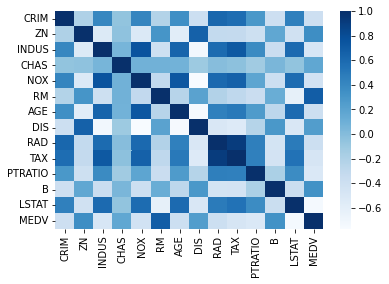

In [ ]:
import seaborn as sns

# pandas의 corr() 을 사용해서 상관계수 구하기
cor = df.corr()

#seaborn의 히트맵을 사용한 시각화
sns.heatmap(cor, annot = False, cmap = plt.cm.Blues)
plt.show()

 - 위에서 대각선은 자신과의 쌍이므로 모두 r = 1
 - 간단하게 모든 상관관계를 분석하는 데 사용 가능
 - 복수의 결과 변수를 한 번에 비교하거나 상관관계가 높은 변수를 찾는 경우 유용

 

In [ ]:
# 타깃 변수에 대한 상관계수 값 구하기
cor_target= abs(cor['MEDV'])
print(cor_target)

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [ ]:
# 한계점 0.6이상의 특징 선택
selected_cols = cor_target[cor_target > 0.6]
print("selected columns, correlation with target > 0.6")
print(selected_cols)

# 선택된 특징 필터 적용
df_sel = df[selected_cols.index]
print(df_sel.head())

selected columns, correlation with target > 0.6
RM       0.695360
LSTAT    0.737663
MEDV     1.000000
Name: MEDV, dtype: float64
           RM  LSTAT  MEDV
record                    
0       6.575   4.98  24.0
1       6.421   9.14  21.6
2       7.185   4.03  34.7
3       6.998   2.94  33.4
4       7.147   5.33  36.2


#### 래퍼기법
 머신 러닝 예측 알고리즘을 사용해서 좋은 예측을 위한 **각 특징의 공헌도를 점수화함**
 - 순차적 버전 : 알고리즘 적합의 각 반복에서 특징 리스트를 업데이트함
    - 업데이트의 방향은 상관 없다
    - 즉, 0개의 특징에서 시작해 하나 혹은 그 이상씩 선택하거나 모든 특징에서 시작해 하나 혹은 그 이상씩 뺄 수 있다
  

##### - 순차적 특징 선택 )
 전방 순차 선택 or 후방 순차 선택 루틴을 사용
 - 그들이 점수화 함수를 결정하고 전략을 업데이트하는 루틴을 가리킴( 특징 +- )
    - 그 루틴을 위해 커스텀 코드 작성
    
      -ex. 예측 알고리즘의 자동 점수화 ) scikit learn의 내장 반복적 특징 제거 기법


In [ ]:
# iris 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/dmdata/iris.csv"); df.index.name = 'record'

In [ ]:
# 선택한 열 지정
cols = [
        'sepal length in cm', 
        'sepal width in cm', 
        'petal length in cm',
        'petal width in cm',
]

In [ ]:
# 서포트 벡터 머신 분류기 (SVC)를 예제 RFE에서 추정기로 사용
# RFE와 분류기 SVC에 대한 모듈 불러오기
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# 독립변수를 X로, 종속 변수를 y로 지정
X = df[cols]
y = df['species']

In [ ]:
# RFE 객체 생성, 각 픽셀의 랭킹 생성

svc = SVC(kernel = 'linear', C = 1)
                          # n_features_to_select = "2" : RFE 객체의 인수로 전달해서 객체는 2개의 특징 선택
rfe = RFE(estimator = svc, n_features_to_select = 2, step = 1) 
rfe.fit(X,y)

# 랭킹 출력
print(cols)

# 선택된 속성들은 1의 중요성을 갖는다 -> [3 2 1 1] 이라고 나왔으므로 petal length, petal width가 선택됨을 알 수 있다
print(rfe.ranking_)

['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
[3 2 1 1]


### 변환
데이터 차원을 감소시키는 흔한 전략 중 하나

원래 데이터를 새롭게 변환시킬 새로운 차원이나 특징 벡터를 선택함
- 한 방향에서 더 유용한 방향으로의 데이터 회전으로 생각할 수 있다
- **어떻게 새로운 특징 벡터방향을 선택하느냐** 가 중요하다
    - 둘다 supervised / unsupervised 인 경우 완전 확정적이고 타깃된 성질 가짐
       - supervised ) 데이터에 레이블 포함
       - unsupervised ) 포함 X 

- 회전 예제 ]
  
        오버헤드 프로젝터의 앞에서 손을 들고 있으며 관찰자에게 무엇이 보이는지 질문 

        손을 여러 방향으로 회전한다고 생각하는 경우 관찰자들에게는 방향에 따라 비둘기, 토끼등 다양한 모습으로 보일 수 있다.

  *즉, 데이터는 바뀌지 않았지만, 데이터를 회전 시킴으로썬 다운스트림 분석에서의 유용성이 바뀔수 있다*



-
- 새로운 특징 벡터 선택 ]
    - 비감독 ) 목표 : 가능한 많은 정보 노출
      
      *특징 분산의 형태에서 정보 최대화하는 방향 찾고 데이터를 고분산의 공간으로 회전*

    - 감독 ) 
    
     *두클래스 레이블을 가장 차별하는 선* 


#### - PCA
비감독의 방법으로 데이터의 차원을 감소시키기 위해 사용됨

-목표 : 
  1. 새로운 특징 벡터를 파악하고 
  2. 데이터의 분산을 최대화  -> 데이터의 분산 최대화하는 새로운 특징 벡터 : **'고유벡터'**
  3. 원래의 데이터를 새로운 공간에 투사하는 것 

- 고유벡터
    - 데이터의 주성분이 됨
    - 덜 중요한 성분을 버리고 가장 중요한 성분만 가지고 있어서 '차원 감소'시 도움



- scikit-learn 은 각 주요 성분의 중요성에 대해 순위를 매길 때 사용될 수 있는 explained_variable_ 속성 제공
- 그 차원을 분산으로 정렬하고 특징들을 제거하기 위해 n_components 옵션 사용

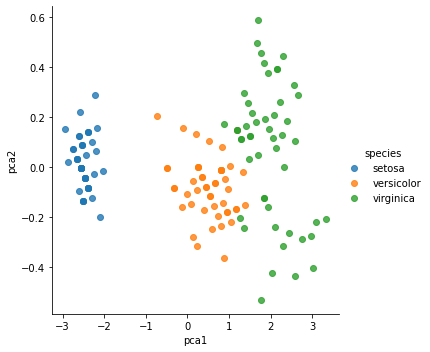

In [ ]:
# 두 개의 결과 차원을 갖는 pca 객체 초기화
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

# 두 개의 입력차원을 사용해서 적합 및 변환
out_pca = pca.fit_transform(df[['petal length in cm','petal width in cm',]])

# pca 결과 데이터프레임을 생성하고 'species' 레이블 명명
df_pca =  pd.DataFrame(data = out_pca, columns = ['pca1','pca2'])
df_pca = pd.concat([df_pca, df[['species']]],axis = 1)

# pca 데이터 스캐터 플롯 생성
sns.lmplot(x = 'pca1', y = 'pca2', hue = 'species', data = df_pca , fit_reg = False)

In [ ]:
# 각 원소에 의해 설명되는 분산 구하기
print(pca.explained_variance_ratio_)

[0.99019934 0.00980066]


#### - LDA
감독된 방법으로 데이터의 차원을 줄이는 데 사용
- 목표 : 
  1. 각 그룹이나 클래스의 평균값을 계산
  2. 각 클래스의 중심을 최대한 분리하거나 차별하는 새로운 차원을 찾아내는 것
  3. 데이터가 새로운 공간으로 회전되고 사상됨

- **판별식** : 분리를 최대화하는 새로운 특징 벡터
    - 각 벡터는 자신과 자신외의 모든 다른 벡터를 비교하는 판별식 있음
    

In [ ]:
# 두 개의 결과 차원을 갖는 lda 객체 초기화
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)

# 두 개의 입력 차원을 사용한 적합 및 변환
cols = ['sepal length in cm', 'sepal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])

# lda 결과 데이터프레임 생성 및 species 열 명명
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]],axis = 1)